In [1]:
import numpy as np

In [2]:
x = np.array([
    [2100,3], 
    [1600,2],
    [2400,4],
    [1416,2],
    [3000,4]
    ])
y = np.array([400000, 330000, 369000, 232000, 540000])

In [3]:
# adding 1s column in the start for intercept or the base value in simple terms
x_b = np.c_[np.ones((x.shape[0], 1)), x]

In [4]:
# this is like the array each cofficeient .. this looks scary but its a simple equation
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T.dot(y))

In [5]:
theta

array([ 17580.56024958,    305.74060835, -95471.40257377])

In [18]:
# this is the prediction based upon just the theta .. 
y_pred = x_b @ (theta)

In [13]:
# thats it .. in predicted prices it is different because it is on a linear plane .. 
print("coefficients (theta) ", theta)
print("Predicted prices: ", y_pred)

coefficients (theta)  [ 17580.56024958    305.74060835 -95471.40257377]
Predicted prices:  [373221.63005329 315822.72845444 369472.4099831  259566.45651891
 552916.77499025]


In [14]:
# done .. now Linear regression is done. les check the values to the original one 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [15]:
# yup this is good .. same as mine .. 
model.predict(x)

array([373221.6300533 , 315822.72845444, 369472.4099831 , 259566.45651891,
       552916.77499025])

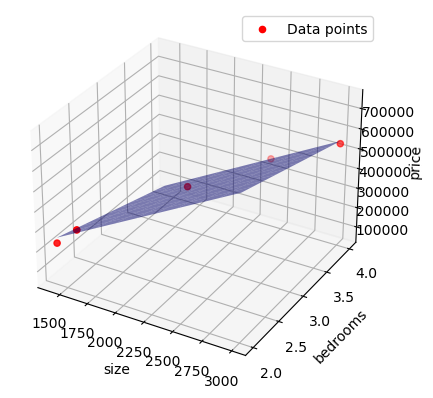

In [16]:
# now let's visulaize this in 3d graph

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x1_range = np.linspace(x[:, 0].min(), x[:, 0].max(), 10)
x2_range = np.linspace(x[:, 1].min(), x[:, 1].max(), 10)
x1_mesh , x2_mesh = np.meshgrid(x1_range, x2_range)

y_mesh = theta[0]+theta[1]*x1_mesh+theta[2]*x2_mesh
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x[:, 0], x[:, 1], y, color='red', label='Data points')
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha = 0.5 , color='blue')
ax.set_xlabel("size")
ax.set_ylabel("bedrooms")
ax.set_zlabel('price')

plt.legend()
plt.show()